In [331]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [332]:
data =  pd.read_csv('./Data/basetable.csv')

In [333]:
data.drop('Unnamed: 0', inplace = True, axis = 1)
data.head()

,client_id,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,...,age-group_80-90,age-group_90-100,campaign_missing,pdays_missing,previous_missing,emp.var.rate_missing,cons.price.idx_missing,cons.conf.idx_missing,euribor3m_missing,nr.employed_missing
0,29925,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,...,0,0,0,0,0,0,0,0,0,0
1,37529,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,...,0,0,0,0,0,0,0,0,0,0
2,2757,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,...,0,0,0,0,0,0,0,0,0,0
3,9642,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,...,0,0,0,0,0,0,0,0,0,0
4,14183,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,...,0,0,0,0,0,0,0,0,0,0


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   client_id                      20000 non-null  int64  
 1   campaign                       20000 non-null  float64
 2   pdays                          20000 non-null  float64
 3   previous                       20000 non-null  float64
 4   emp.var.rate                   20000 non-null  float64
 5   cons.price.idx                 20000 non-null  float64
 6   cons.conf.idx                  20000 non-null  float64
 7   euribor3m                      20000 non-null  float64
 8   nr.employed                    20000 non-null  float64
 9   subscribe                      20000 non-null  int64  
 10  job_admin.                     20000 non-null  int64  
 11  job_blue-collar                20000 non-null  int64  
 12  job_entrepreneur               20000 non-null 

In [335]:
y = data['subscribe']
X = data.drop('subscribe', axis = 1)
print(X.shape)
print(y.shape)

(20000, 83)
(20000,)


In [363]:
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=2000, max_depth=5, n_jobs = 5000, max_samples = 3000, random_state=42)
cv_results = cross_validate(rf, X, y, cv=5)

score  = 0 
cv_results['test_score']
for test_score in cv_results['test_score']:
    score = score + test_score

print(score/5)

In [336]:
rf = RandomForestClassifier(n_estimators=2000, max_depth=5, n_jobs = 5000, max_samples = 3000, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,  random_state=42)

rf.fit(X_train, y_train)

# predict probabilities
pred_train = rf.predict_proba(X_train)
pred_test = rf.predict_proba(X_test)


In [337]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)

In [338]:
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
print(percentage)

0.11355


In [339]:
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1

In [340]:
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)

In [341]:
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"rf": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'rf': {'Acc_train': 0.8226428571428571, 'Acc_test': 0.8161666666666667}}

In [342]:
print(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

0.8016849619144633
0.7914359046987236


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


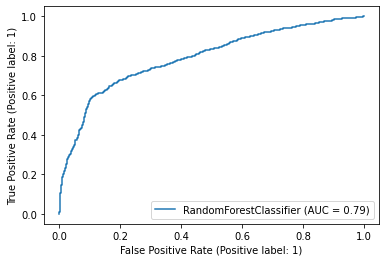

In [343]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

In [344]:
y_test.value_counts()

0    5319
1     681
Name: subscribe, dtype: int64

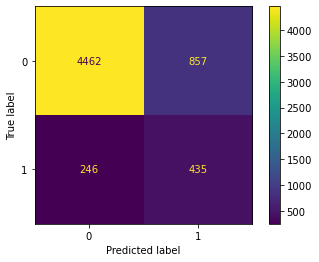

In [345]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [346]:
forward_selection_features = ['job_student', 'marital_single', 'default_no' ,  'contact_telephone', 'month_apr',  'month_dec',  'month_jun',  'month_mar' , 'month_oct' , 'month_sep', 'day_of_week_mon',  'poutcome_success',  'age-group_60-70' , 'age-group_70-80',  'age-group_80-90']

backward_selection_features = ['pdays', 'cons.conf.idx', 'nr.employed', 'job_blue-collar','contact_telephone', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'day_of_week_mon', 'poutcome_nonexistent', 'poutcome_success', 'pdays_missing', 'cons.conf.idx_missing', 'nr.employed_missing']

In [347]:
rf = RandomForestClassifier(n_estimators=2000, max_depth=5, n_jobs = 5000, max_samples = 3000, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,forward_selection_features], y, stratify=y,  test_size=0.3, random_state=42)

rf.fit(X_train, y_train)

# predict probabilities
pred_train = rf.predict_proba(X_train)
pred_test = rf.predict_proba(X_test)


In [348]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8472857142857143, 'Acc_test': 0.8416666666666667}}

In [349]:
print(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

0.7572952173891008
0.7601083197436724


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


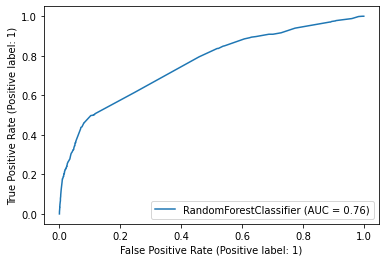

In [350]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

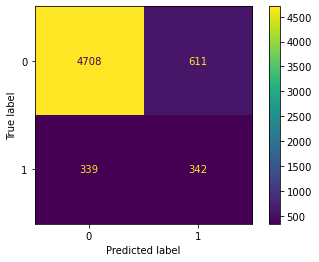

In [351]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [352]:
rf = RandomForestClassifier(n_estimators=2000, max_depth=5, n_jobs = 5000, max_samples = 3000, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,backward_selection_features], y, stratify=y,  test_size=0.3, random_state=42)

rf.fit(X_train, y_train)

# predict probabilities
pred_train = rf.predict_proba(X_train)
pred_test = rf.predict_proba(X_test)

In [353]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.835, 'Acc_test': 0.8243333333333334}}

In [354]:
print(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

0.7837217399236769
0.7867446074099473


C:\tools\Anaconda3\envs\py\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


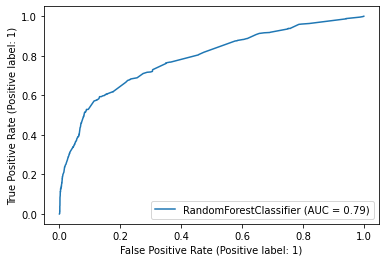

In [355]:
from sklearn import datasets, metrics

metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

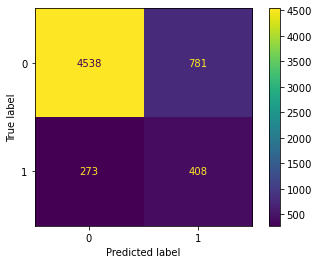

In [356]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [357]:
X_norm = pd.DataFrame()
for col in X.columns:
    X_norm[col] = X[col].map(lambda x: (x - np.mean(X[col]))/ np.std(X[col]))

In [358]:
rf = RandomForestClassifier(n_estimators=2000, max_depth=5, n_jobs = 5000, max_samples = 3000, random_state=42)
    # split in train and test data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, stratify=y,  test_size=0.3, random_state=42)

rf.fit(X_train, y_train)

# predict probabilities
pred_train = rf.predict_proba(X_train)
pred_test = rf.predict_proba(X_test)

In [359]:
pred_train = pd.DataFrame(pred_train)
pred_test = pd.DataFrame(pred_test)
percentage = data[data.subscribe == 1].shape[0]/data.shape[0]
pred_train.loc[pred_train[1] > percentage, 'y'] = 1
pred_test.loc[pred_test[1] > percentage, 'y'] = 1
pred_train['y'] =  np.where(pred_train['y'] == 1, 1, 0)
pred_test['y'] =  np.where(pred_test['y'] == 1, 1, 0)
# evaluate predictions
mlp_acc_train = accuracy_score(y_train, pred_train['y'])
mlp_acc_test = accuracy_score(y_test, pred_test['y'])

eval_dict = {"dtree": {"Acc_train": mlp_acc_train, "Acc_test": mlp_acc_test}}
eval_dict

{'dtree': {'Acc_train': 0.8226428571428571, 'Acc_test': 0.816}}

In [360]:
print(roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1]))
print(roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

0.8016855700667447
0.7914339721923372


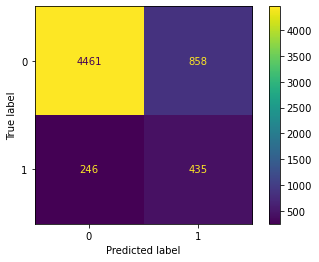

In [361]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test['y'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()